In [176]:
#pip install folium
#pip install geopy

In [194]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from geopy.distance import geodesic


## 1. Импорт данных в data.frame pandas

In [195]:
df = pd.read_excel('data/Данные для заданий и кейса.xlsx')
df.head()

,Дата смены,Город,Название станции доставки,Название компании курьера,Ид смены курьера,Плановое начало смены (время начала погрузки на станции доставки),Тип_авто,"Протяженность маршрута курьера, км (факт)",Общее кол-во адресов доставки,Кол-во адресов самовывоза,Кол-во отсканированных на СЦ заказов,Общее кол-во доставленных заказов,Кол-во заказов в самовывоз,"Среднее время на станции доставки, мин (факт)","Среднее время до 1-й точки маршрута, мин (факт)","Среднее время на точке маршрута, мин (факт)","Среднее время между точками маршрута, мин (факт)"
0,2021-01-01,Санкт-Петербург,СД_2,Компания_1,2591025,08:30:00,Грузовая,153.313598,30,13,138,137,117,100.900000,86.866667,4.736979,4.900538
1,2021-01-01,Самара,СД_29,Компания_1,2591910,10:00:00,Легковая,221.840968,19,7,143,141,119,118.750000,42.750000,8.799123,17.395370
2,2021-01-01,Екатеринбург,СД_31,Компания_2,2590736,07:30:00,Легковая,84.452701,19,4,115,114,72,77.033333,485.333333,2.099275,9.570455
3,2021-01-01,Уфа,СД_11,Компания_2,2590864,10:00:00,Грузовая,100.960308,20,7,142,141,124,156.433333,109.000000,3.965000,13.260526
4,2021-01-01,Самара,СД_29,Компания_1,2591867,10:00:00,Грузовая,73.391196,25,6,165,165,141,143.666667,34.466667,3.046667,12.029861


In [196]:
df.shape

(2594, 17)

In [197]:
df.columns

Index(['Дата смены', 'Город', 'Название станции доставки',
       'Название компании курьера', 'Ид смены курьера',
       'Плановое начало смены (время начала погрузки на станции доставки)',
       'Тип_авто', 'Протяженность маршрута курьера, км (факт)',
       'Общее кол-во адресов доставки', 'Кол-во адресов самовывоза',
       'Кол-во отсканированных на СЦ заказов',
       'Общее кол-во доставленных заказов', 'Кол-во заказов в самовывоз',
       'Среднее время на станции доставки, мин (факт)',
       'Среднее время до 1-й точки маршрута, мин (факт)',
       'Среднее время на точке маршрута, мин (факт)',
       'Среднее время между точками маршрута, мин (факт)'],
      dtype='object')

## 2.Группировка данных по водителям доставки и вычисление среднего времени доставки для каждого водителя

In [198]:
# Группировка данных по водителям и вычисление среднего времени доставки
df['Среднее время доставки, мин'] = (df['Среднее время на станции доставки, мин (факт)'] 
                                       + df['Среднее время до 1-й точки маршрута, мин (факт)'] 
                                       + (df['Общее кол-во доставленных заказов'] * df['Среднее время на точке маршрута, мин (факт)']) 
                                       + ((df['Общее кол-во доставленных заказов'] - 1) * df['Среднее время между точками маршрута, мин (факт)']))

# Группировка данных по водителям доставки и вычисление суммарного времени доставки для каждого водителя
avg_driver = df.groupby('Ид смены курьера')['Среднее время доставки, мин'].mean() 

avg_driver.head()

Ид смены курьера
2588456    1982.649399
2588457            NaN
2588458     833.754872
2588459     957.508431
2588460    2194.351634
Name: Среднее время доставки, мин, dtype: float64

##  3.Определить 10 лучших водителей по среднему времени доставки

In [199]:
# Ascending True ПОТОМУ ЧТО лучший водитель тот который доставляет быстрее. 

In [200]:
 
# Группировка данных по водителям доставки и вычисление суммарного времени доставки для каждого водителя
top_10_avg_driver = df.groupby('Ид смены курьера')['Среднее время доставки, мин'].mean().sort_values(ascending = True)

top_10_avg_driver.head(10)

Ид смены курьера
2593867     48.433333
2593667     73.731515
2594087    106.545833
2593887    151.000000
2593587    151.873504
2593829    152.472222
2593570    153.516667
2593218    155.083333
2593224    160.083333
2593768    165.743590
Name: Среднее время доставки, мин, dtype: float64

In [201]:
df

,Дата смены,Город,Название станции доставки,Название компании курьера,Ид смены курьера,Плановое начало смены (время начала погрузки на станции доставки),Тип_авто,"Протяженность маршрута курьера, км (факт)",Общее кол-во адресов доставки,Кол-во адресов самовывоза,Кол-во отсканированных на СЦ заказов,Общее кол-во доставленных заказов,Кол-во заказов в самовывоз,"Среднее время на станции доставки, мин (факт)","Среднее время до 1-й точки маршрута, мин (факт)","Среднее время на точке маршрута, мин (факт)","Среднее время между точками маршрута, мин (факт)","Среднее время доставки, мин"
0,2021-01-01,Санкт-Петербург,СД_2,Компания_1,2591025,08:30:00,Грузовая,153.313598,30,13,138,137,117,100.900000,86.866667,4.736979,4.900538,1503.205931
1,2021-01-01,Самара,СД_29,Компания_1,2591910,10:00:00,Легковая,221.840968,19,7,143,141,119,118.750000,42.750000,8.799123,17.395370,3837.528168
2,2021-01-01,Екатеринбург,СД_31,Компания_2,2590736,07:30:00,Легковая,84.452701,19,4,115,114,72,77.033333,485.333333,2.099275,9.570455,1883.145422
3,2021-01-01,Уфа,СД_11,Компания_2,2590864,10:00:00,Грузовая,100.960308,20,7,142,141,124,156.433333,109.000000,3.965000,13.260526,2680.972018
4,2021-01-01,Самара,СД_29,Компания_1,2591867,10:00:00,Грузовая,73.391196,25,6,165,165,141,143.666667,34.466667,3.046667,12.029861,2653.730556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,2021-01-01,Москва,СД_33,Компания_1,2593074,10:00:00,Грузовая,33.568653,21,1,58,55,11,54.550000,4.800000,1.575000,8.392857,599.189286
2590,2021-01-01,Санкт-Петербург,СД_2,Компания_3,2591495,12:00:00,Грузовая,130.582974,33,5,113,113,77,144.000000,32.850000,3.536486,11.063889,1815.628529
2591,2021-01-01,Москва,СД_36,Компания_6,2593607,08:30:00,Грузовая,157.923503,20,12,20,20,12,29.816667,1.316667,12.280702,7.914815,427.128850
2592,2021-01-01,Хабаровск,СД_21,Компания_1,2592660,09:00:00,Легковая,65.886754,17,7,50,50,33,236.516667,7.633333,7.991667,3.649020,822.535294


In [202]:

# Группировка данных по дате смены и вычисление среднего времени доставки и количества заказов в этот день
daily_avg_delivery_time_orders = df.groupby('Дата смены')[['Среднее время доставки, мин', 'Общее кол-во доставленных заказов']].mean()


In [203]:
daily_avg_delivery_time_orders

,"Среднее время доставки, мин",Общее кол-во доставленных заказов
Дата смены,,
2021-01-01,2186.655877,106.284503


## 4. Создает столбчатую диаграмму, которая визуализирует зависимость кол-ва заказов на маршрут и среднего времени потраченного на доставку в этот день

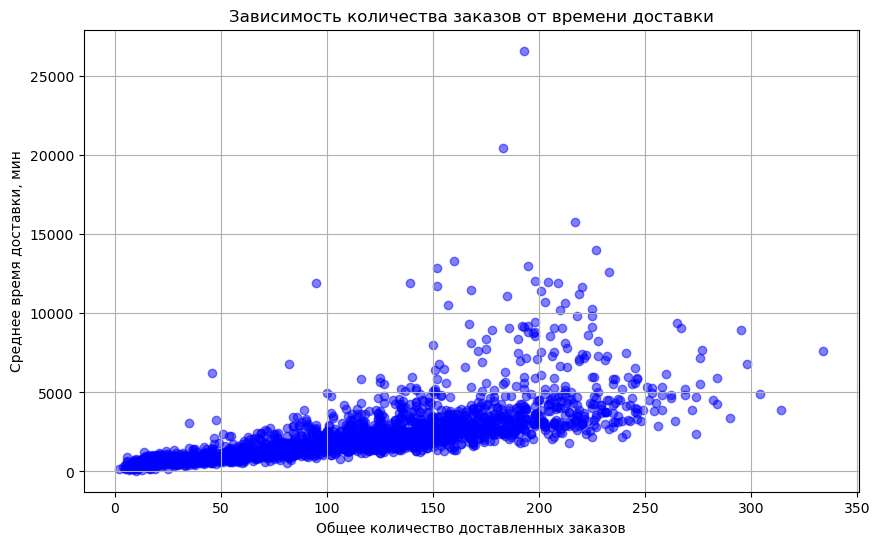

In [204]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Общее кол-во доставленных заказов'], df['Среднее время доставки, мин'], color='blue', alpha=0.5)

# Настройка осей и заголовков
plt.title('Зависимость количества заказов от времени доставки')
plt.xlabel('Общее количество доставленных заказов')
plt.ylabel('Среднее время доставки, мин')

# Вывод диаграммы
plt.grid(True)
plt.show()

## 5. Напишите функцию python, которая принимает data.frame данных и город в качестве  входных данных и возвращает среднее время доставки в этот городе

In [205]:
avg_delivery_time_by_city = df.groupby('Город')['Среднее время доставки, мин'].mean().round(2)

print(avg_delivery_time_by_city)

Город
Барнаул               1769.37
Владивосток           2649.16
Волгоград              685.37
Воронеж               1588.54
Екатеринбург          2380.20
Ижевск                2536.71
Иркутск               2009.52
Казань                1583.62
Кемерово              1628.74
Краснодар             1869.64
Красноярск            3103.40
Махачкала             3974.73
Москва                2065.36
Московская область    1011.77
Нижний Новгород       1815.22
Новосибирск           4089.87
Омск                  1571.93
Пермь                 2711.79
Ростов-на-Дону        2627.75
Самара                2442.33
Санкт-Петербург       2058.85
Саратов               2072.73
Тольятти              2108.27
Томск                 4874.58
Тюмень                1538.61
Ульяновск             1338.05
Уфа                   2423.34
Хабаровск             1330.28
Челябинск             3291.47
Ярославль             2073.66
Name: Среднее время доставки, мин, dtype: float64


In [206]:
specific_cities = ['Барнаул', 'Владивосток', 'Волгоград']  # Add the cities you want to select here

# Filtering the DataFrame to include only the specific cities
specific_cities = avg_delivery_time_by_city.loc[specific_cities]

print(specific_cities)

Город
Барнаул        1769.37
Владивосток    2649.16
Волгоград       685.37
Name: Среднее время доставки, мин, dtype: float64


In [207]:

def convert_to_hours(avg_delivery_time_by_city):
    hours = avg_delivery_time_by_city // 60
    return f"{hours} ч "

 
avg_delivery_hours = convert_to_hours(avg_delivery_time_by_city)
print("Среднее время доставки в часах:")
print(avg_delivery_hours)

Среднее время доставки в часах:
Город
Барнаул               29.0
Владивосток           44.0
Волгоград             11.0
Воронеж               26.0
Екатеринбург          39.0
Ижевск                42.0
Иркутск               33.0
Казань                26.0
Кемерово              27.0
Краснодар             31.0
Красноярск            51.0
Махачкала             66.0
Москва                34.0
Московская область    16.0
Нижний Новгород       30.0
Новосибирск           68.0
Омск                  26.0
Пермь                 45.0
Ростов-на-Дону        43.0
Самара                40.0
Санкт-Петербург       34.0
Саратов               34.0
Тольятти              35.0
Томск                 81.0
Тюмень                25.0
Ульяновск             22.0
Уфа                   40.0
Хабаровск             22.0
Челябинск             54.0
Ярославль             34.0
Name: Среднее время доставки, мин, dtype: float64 ч 


## 6. Взять карту России (Московскую область покрасить в желтый цвет), а регионы, чьи областные центры удалены от МСК меньше, чем на 500 км - в зеленый

In [113]:
df.Город.unique()

array(['Санкт-Петербург', 'Самара', 'Екатеринбург', 'Уфа',
       'Нижний Новгород', 'Москва', 'Омск', 'Казань', 'Челябинск',
       'Московская область', 'Ульяновск', 'Пермь', 'Новосибирск',
       'Барнаул', 'Красноярск', 'Волгоград', 'Хабаровск', 'Владивосток',
       'Ижевск', 'Тольятти', 'Махачкала', 'Саратов', 'Воронеж', 'Тюмень',
       'Ростов-на-Дону', 'Иркутск', 'Краснодар', 'Кемерово', 'Томск',
       'Ярославль'], dtype=object)

In [124]:
df2 = pd.read_excel('data/spisok_gorodov_RU.xlsx')
df2

,Название города,Регион,Округ,Широта,Долгота
0,Хмельницкий,Хмельницкая область,Центральная Украина,49.416668,27.000000
1,Каменец-Подольский,Хмельницкая область,Центральная Украина,48.683334,26.583332
2,Нетишин,Хмельницкая область,Центральная Украина,50.346695,26.633587
3,Славута,Хмельницкая область,Центральная Украина,50.299999,26.866667
4,Староконстантинов,Хмельницкая область,Центральная Украина,49.755554,27.220833
...,...,...,...,...,...
1043,Вязовая,Челябинская область,Уральский федеральный округ,54.906101,58.374310
1044,Каспийск,Республика Дагестан,Северо-Кавказский федеральный округ,42.882751,47.638248
1045,Яхрома,Московская область,Центральный федеральный округ,56.294109,37.484669
1046,Апрелевка,Московская область,Центральный федеральный округ,55.545300,37.061920


In [131]:
df2 = df2[['Название города', 'Широта', 'Долгота']]

In [139]:
df2['Название города'].unique() 

array(['Хмельницкий', 'Каменец-Подольский', 'Нетишин', ..., 'Яхрома',
       'Апрелевка', 'Покров'], dtype=object)

In [143]:
df2

,Название города,Широта,Долгота
0,Хмельницкий,49.416668,27.000000
1,Каменец-Подольский,48.683334,26.583332
2,Нетишин,50.346695,26.633587
3,Славута,50.299999,26.866667
4,Староконстантинов,49.755554,27.220833
...,...,...,...
1043,Вязовая,54.906101,58.374310
1044,Каспийск,42.882751,47.638248
1045,Яхрома,56.294109,37.484669
1046,Апрелевка,55.545300,37.061920


In [144]:
df2

,Название города,Широта,Долгота
0,Хмельницкий,49.416668,27.000000
1,Каменец-Подольский,48.683334,26.583332
2,Нетишин,50.346695,26.633587
3,Славута,50.299999,26.866667
4,Староконстантинов,49.755554,27.220833
...,...,...,...
1043,Вязовая,54.906101,58.374310
1044,Каспийск,42.882751,47.638248
1045,Яхрома,56.294109,37.484669
1046,Апрелевка,55.545300,37.061920


In [145]:
unique_cities = pd.unique(df['Город'])
unique_cities_df = pd.DataFrame(unique_cities, columns=['Города'])
unique_cities_df

,Города
0,Санкт-Петербург
1,Самара
2,Екатеринбург
3,Уфа
4,Нижний Новгород
5,Москва
6,Омск
7,Казань
8,Челябинск
9,Московская область


In [154]:

merged_df = pd.merge(df2[['Название города', 'Широта','Долгота']].drop_duplicates(), unique_cities_df, left_on='Название города', right_on='Города', how='left')

filtered_df = merged_df[merged_df['Города'] == merged_df['Название города']]
filtered_df

,Название города,Широта,Долгота,Города
73,Воронеж,51.769001,33.471912,Воронеж
342,Барнаул,53.356339,83.761650,Барнаул
376,Владивосток,43.130692,131.923828,Владивосток
411,Воронеж,51.660019,39.197411,Воронеж
415,Волгоград,48.718079,44.504639,Волгоград
508,Ростов-на-Дону,47.233189,39.715000,Ростов-на-Дону
530,Казань,55.796539,49.108200,Казань
565,Краснодар,45.042149,38.980640,Краснодар
566,Красноярск,56.001251,92.885590,Красноярск
569,Иркутск,52.275261,104.308640,Иркутск


In [159]:
#filtered_df.drop(['Города'], axis=1, inplace=True)


In [162]:
filtered_df.reset_index(drop=True, inplace = True)

In [163]:
filtered_df

,Название города,Широта,Долгота
0,Воронеж,51.769001,33.471912
1,Барнаул,53.356339,83.761650
2,Владивосток,43.130692,131.923828
3,Воронеж,51.660019,39.197411
4,Волгоград,48.718079,44.504639
5,Ростов-на-Дону,47.233189,39.715000
6,Казань,55.796539,49.108200
7,Краснодар,45.042149,38.980640
8,Красноярск,56.001251,92.885590
9,Иркутск,52.275261,104.308640


In [166]:
R = 6371

# Преобразование широты и долготы в радианы
filtered_df['Широта (рад)'] = np.radians(filtered_df['Широта'])
filtered_df['Долгота (рад)'] = np.radians(filtered_df['Долгота'])

# Функция для вычисления расстояния между двумя точками по формуле гаверсинуса
def haversine_distance(lat1, lon1, lat2, lon2):
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

# Вычисление расстояния между городами
filtered_df['Расстояние до Москвы (км)'] = haversine_distance(filtered_df['Широта (рад)'], filtered_df['Долгота (рад)'], np.radians(55.7558), np.radians(37.6176))

# Печать результата
print(filtered_df[['Название города', 'Расстояние до Москвы (км)']])

    Название города  Расстояние до Москвы (км)
0           Воронеж                 520.157504
1           Барнаул                2931.910821
2       Владивосток                6416.243062
3           Воронеж                 467.115853
4         Волгоград                 911.324010
5    Ростов-на-Дону                 958.612964
6            Казань                 717.801476
7         Краснодар                1195.153220
8        Красноярск                3353.902104
9           Иркутск                4203.903106
10         Кемерово                2983.133457
11           Ижевск                 968.293685
12        Махачкала                1587.562187
13  Нижний Новгород                 401.932508
14      Новосибирск                2810.866420
15             Омск                2237.527216
16           Москва                   0.002572
17            Пермь                1154.393367
18          Саратов                 725.944445
19           Самара                 857.135241
20  Санкт-Пет

C:\Users\dell\AppData\Local\Temp\ipykernel_8932\826687599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Широта (рад)'] = np.radians(filtered_df['Широта'])
C:\Users\dell\AppData\Local\Temp\ipykernel_8932\826687599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Долгота (рад)'] = np.radians(filtered_df['Долгота'])
C:\Users\dell\AppData\Local\Temp\ipykernel_8932\826687599.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [186]:
filtered_df

,Название города,Широта,Долгота,Широта (рад),Долгота (рад),Расстояние до Москвы (км)
0,Воронеж,51.769001,33.471912,0.903540,0.584195,520.157504
1,Барнаул,53.356339,83.761650,0.931244,1.461917,2931.910821
2,Владивосток,43.130692,131.923828,0.752773,2.302505,6416.243062
3,Воронеж,51.660019,39.197411,0.901637,0.684124,467.115853
4,Волгоград,48.718079,44.504639,0.850291,0.776752,911.324010
5,Ростов-на-Дону,47.233189,39.715000,0.824375,0.693158,958.612964
6,Казань,55.796539,49.108200,0.973833,0.857100,717.801476
7,Краснодар,45.042149,38.980640,0.786134,0.680341,1195.153220
8,Красноярск,56.001251,92.885590,0.977406,1.621159,3353.902104
9,Иркутск,52.275261,104.308640,0.912375,1.820529,4203.903106


### Базовая диаграмма

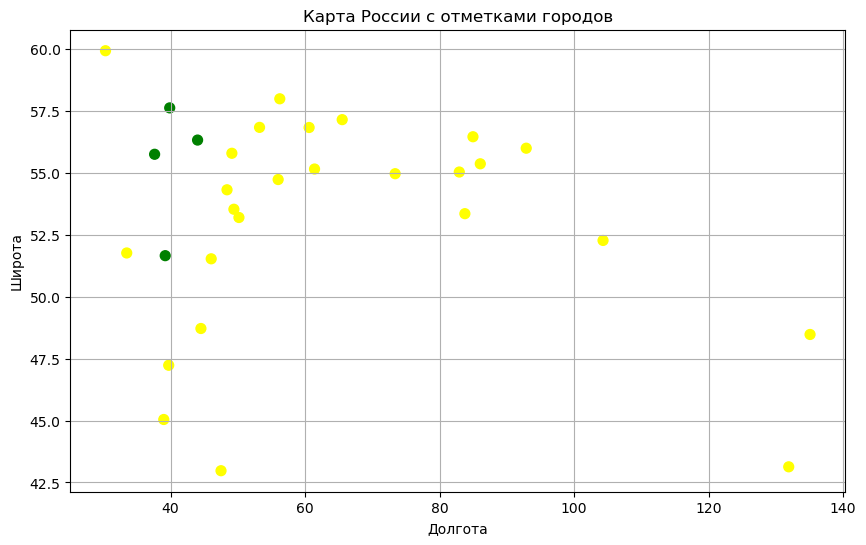

In [172]:
import matplotlib.pyplot as plt

# Определение цвета для каждого города в зависимости от расстояния до Москвы
colors = []
for distance in filtered_df["Расстояние до Москвы (км)"]:
    if distance <= 500:
        colors.append('green')  # Регионы, удаленные на расстояние <= 500 км от Москвы, окрасим в зеленый цвет
    else:
        colors.append('yellow')  # Остальные регионы окрасим в желтый цвет

# Построение карты России с отметками городов, окрашенных в соответствии с расстоянием до Москвы
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Долгота'], filtered_df['Широта'], c=colors, s=50)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Карта России с отметками городов')
plt.grid(True)
plt.show()


# Реальная карта

In [193]:
 

# Sample data (replace with your actual data)
data = {
    "Region": filtered_df['Название города'],
    "Latitude": filtered_df['Широта'],  # Replace with actual latitude values
    "Longitude": filtered_df['Долгота']  # Replace with actual longitude values
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add a column for distances from Moscow
moscow_coords = (55.7558, 37.6176)
df["Distance from Moscow (km)"] = df.apply(lambda row: geodesic(moscow_coords, (row["Latitude"], row["Longitude"])).km, axis=1)

# Initialize the map centered on Moscow
m = folium.Map(location=[55.7558, 37.6176], zoom_start=5)

# Plot markers for each region
for index, row in df.iterrows():
    # Assign color based on distance from Moscow
    if row["Distance from Moscow (km)"] <= 500:
        color = "orange"
    else:
        color = "green"
    
    # Add marker to the map
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Region"],
        icon=folium.Icon(color=color),
    ).add_to(m)

# Display the map
m

